In [4]:
pip install pandas networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd

nodes_data = {
    'ID': [
        'Title_main','Chapter1', 'Subtopic1_1', 'Subtopic1_2', 'Subtopic1_3', 'Chapter2','Subtopic2_1', 'Subtopic2_2', 'Subtopic2_3','Chapter3','Subtopic3_1', 'Subtopic3_2', 'Subtopic3_3','Chapter4','Subtopic4_1', 'Subtopic4_2', 'Subtopic4_3' ,
        'Chapter5','Subtopic5_1', 'Subtopic5_2', 'Subtopic5_3', 'Chapter6','Subtopic6_1', 'Subtopic6_2', 'Subtopic6_3', 'Chapter7','Subtopic7_1', 'Subtopic7_2', 'Subtopic7_3'
    ],
    'Type': [
        'Title','Chapter', 'Subtopic', 'Subtopic', 'Subtopic','Chapter','Subtopic', 'Subtopic', 'Subtopic', 'Chapter','Subtopic', 'Subtopic', 'Subtopic', 'Chapter', 'Subtopic', 'Subtopic', 'Subtopic',
        'Chapter','Subtopic', 'Subtopic', 'Subtopic', 'Chapter','Subtopic', 'Subtopic', 'Subtopic', 'Chapter','Subtopic', 'Subtopic', 'Subtopic'
    ],
    'Name': [
        'Physics','Units and Measurements','The International SystemCentre of mass of Units', 
        'Significant Figures', 'Dimensions of Physical Quantities', 'Motion in a Straight Line','Instantaneous velocity and speed','Acceleration','Kinematic equations for uniformly accelerated motion',
        'Motion in a Plane','Scalars and vectors ','Multiplication of vectors by real numbers','Motion in a plane with constant acceleration', 'Laws of Motion','Aristotle’s fallacy','The law of inertia','Newtons law of motion', 'Work, Energy and Power','Work','Kinetic energy','Work done by a variable force', 
        'System of Particles and Rotational Motion','Centre of mass','Moment of inertia','Vector product of two vectors', 'Gravitation','Kepler’s laws','Universal law of gravitation','Escape speed '
    ]
}

nodes_df = pd.DataFrame(nodes_data)
print(nodes_df)


             ID      Type                                               Name
0    Title_main     Title                                            Physics
1      Chapter1   Chapter                             Units and Measurements
2   Subtopic1_1  Subtopic    The International SystemCentre of mass of Units
3   Subtopic1_2  Subtopic                                Significant Figures
4   Subtopic1_3  Subtopic                  Dimensions of Physical Quantities
5      Chapter2   Chapter                          Motion in a Straight Line
6   Subtopic2_1  Subtopic                   Instantaneous velocity and speed
7   Subtopic2_2  Subtopic                                       Acceleration
8   Subtopic2_3  Subtopic  Kinematic equations for uniformly accelerated ...
9      Chapter3   Chapter                                  Motion in a Plane
10  Subtopic3_1  Subtopic                               Scalars and vectors 
11  Subtopic3_2  Subtopic          Multiplication of vectors by real numbers

In [90]:
import pandas as pd

relationships_data = {
    'Source': [
        'Subtopic1_1', 'Subtopic1_2', 'Subtopic1_3', 'Subtopic2_1', 
        'Subtopic2_2', 'Subtopic2_3','Subtopic3_1', 'Subtopic3_2', 'Subtopic3_3','Subtopic4_1', 'Subtopic4_2', 'Subtopic4_3','Subtopic5_1', 'Subtopic5_2', 'Subtopic5_3','Subtopic6_1', 'Subtopic6_2', 'Subtopic6_3','Subtopic7_1', 'Subtopic7_2', 'Subtopic7_3','Chapter1', 'Chapter2', 'Chapter3', 'Chapter4', 
        'Chapter5', 'Chapter6','Chapter7'
    ],
    'Target': [
        'Chapter1', 'Chapter1', 'Chapter1', 'Chapter2', 
        'Chapter2', 'Chapter2','Chapter3', 'Chapter3', 'Chapter3','Chapter4', 'Chapter4', 'Chapter4','Chapter5', 'Chapter5', 'Chapter5','Chapter6', 'Chapter6', 'Chapter6','Chapter7', 'Chapter7', 'Chapter7','Title_main','Title_main','Title_main','Title_main','Title_main','Title_main','Title_main'
    ],
    'Relation': [
        'belongs to', 'belongs to', 'belongs to', 'belongs to',
        'belongs to', 'belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to','belongs to'
    ]
}

relationships_df = pd.DataFrame(relationships_data)
print(relationships_df)


         Source      Target    Relation
0   Subtopic1_1    Chapter1  belongs to
1   Subtopic1_2    Chapter1  belongs to
2   Subtopic1_3    Chapter1  belongs to
3   Subtopic2_1    Chapter2  belongs to
4   Subtopic2_2    Chapter2  belongs to
5   Subtopic2_3    Chapter2  belongs to
6   Subtopic3_1    Chapter3  belongs to
7   Subtopic3_2    Chapter3  belongs to
8   Subtopic3_3    Chapter3  belongs to
9   Subtopic4_1    Chapter4  belongs to
10  Subtopic4_2    Chapter4  belongs to
11  Subtopic4_3    Chapter4  belongs to
12  Subtopic5_1    Chapter5  belongs to
13  Subtopic5_2    Chapter5  belongs to
14  Subtopic5_3    Chapter5  belongs to
15  Subtopic6_1    Chapter6  belongs to
16  Subtopic6_2    Chapter6  belongs to
17  Subtopic6_3    Chapter6  belongs to
18  Subtopic7_1    Chapter7  belongs to
19  Subtopic7_2    Chapter7  belongs to
20  Subtopic7_3    Chapter7  belongs to
21     Chapter1  Title_main  belongs to
22     Chapter2  Title_main  belongs to
23     Chapter3  Title_main  belongs to


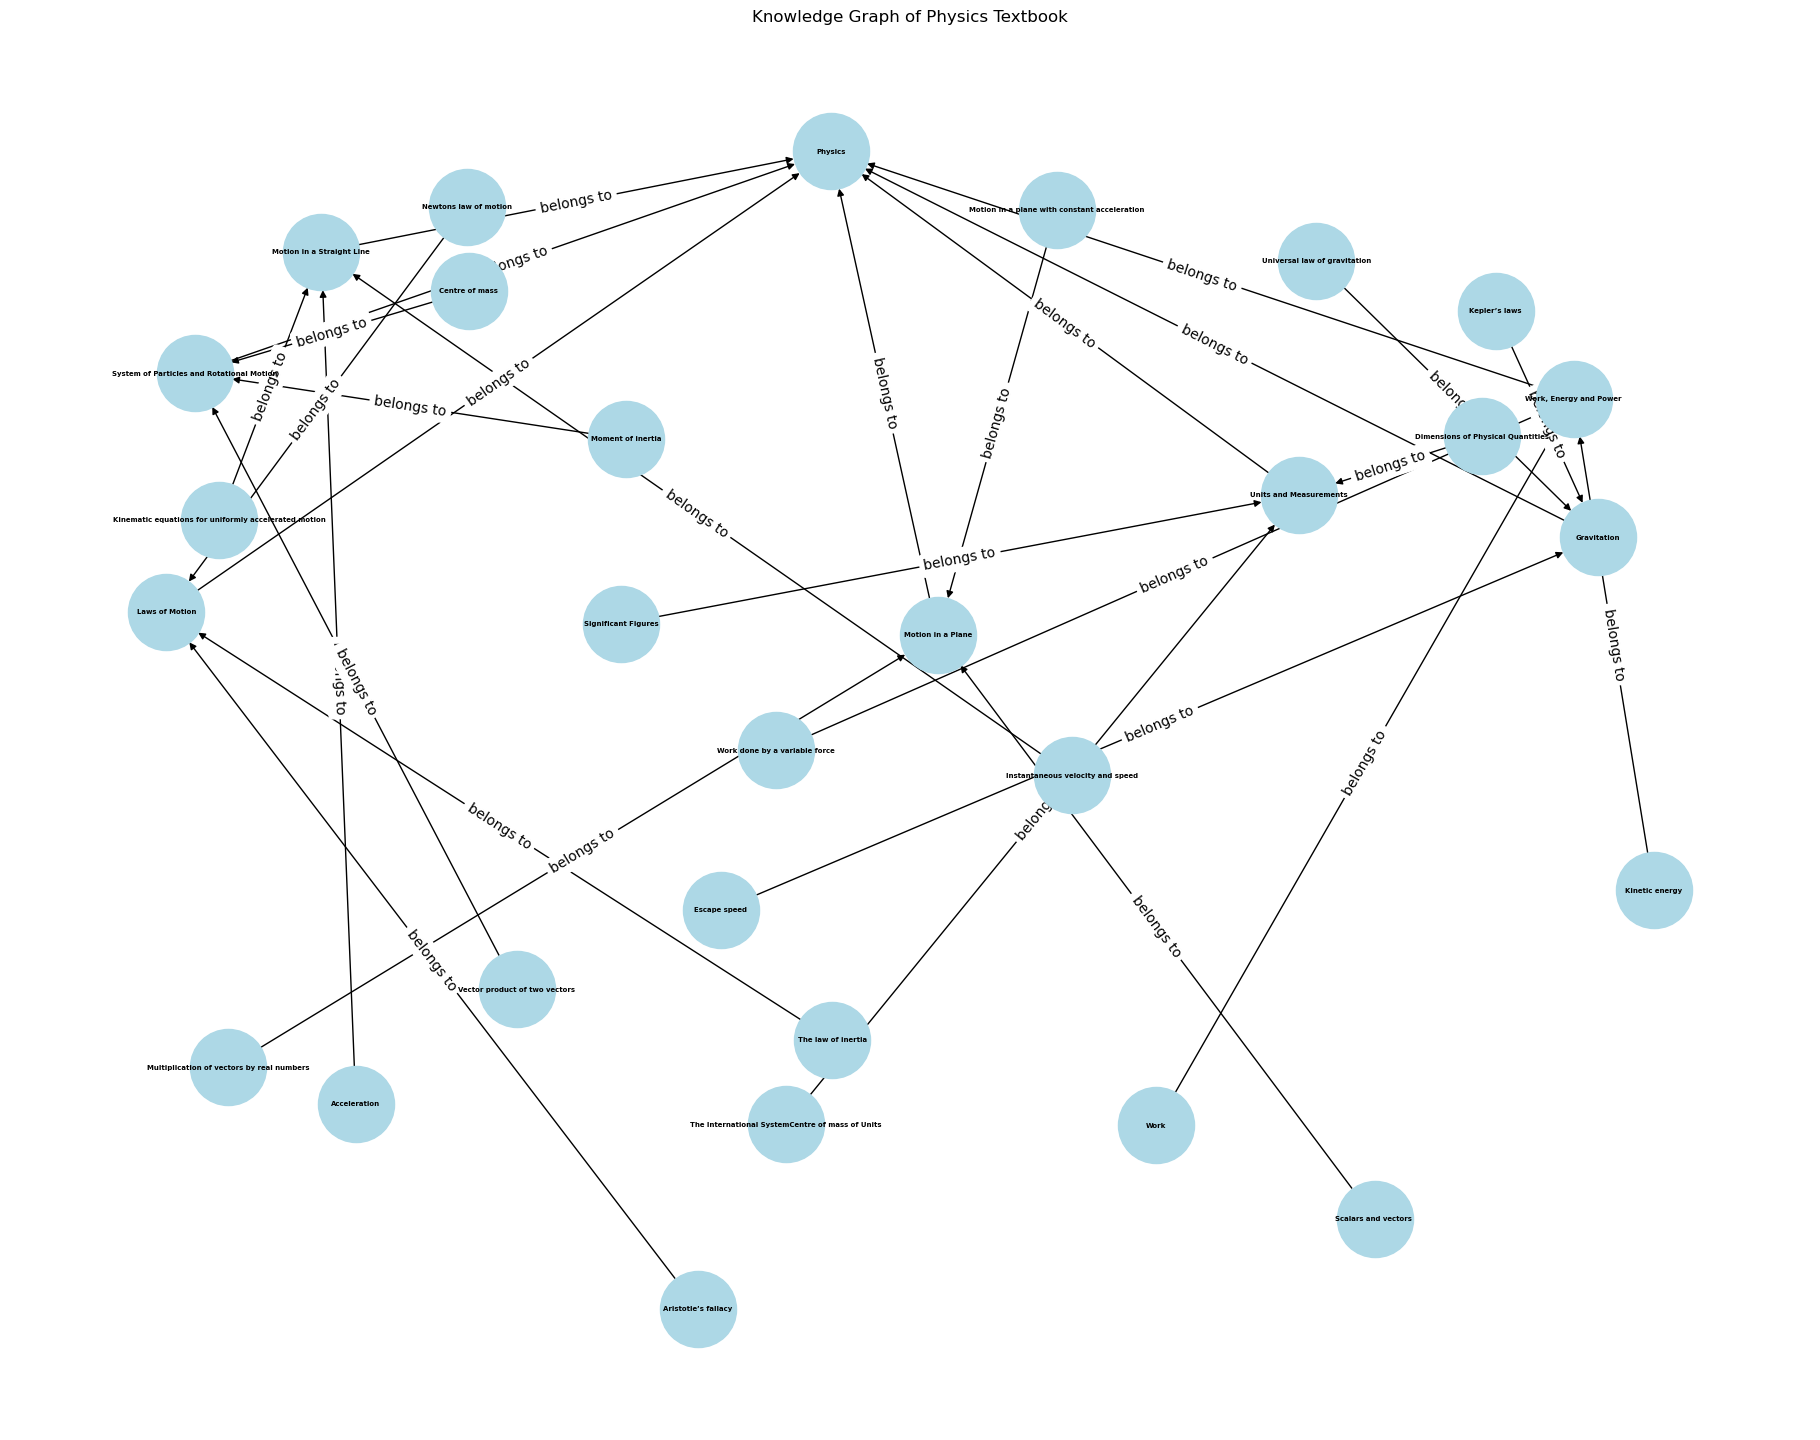

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in nodes_df.iterrows():
    G.add_node(row['ID'], type=row['Type'], name=row['Name'])

for _, row in relationships_df.iterrows():
    G.add_edge(row['Source'], row['Target'], relation=row['Relation'])

pos = nx.spring_layout(G, seed=42,k = 1.0)  
node_labels = nx.get_node_attributes(G, 'name')
edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(18, 14))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, node_color='lightblue', font_size=5, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Knowledge Graph of Physics Textbook')
plt.show()
